In [1]:
def score_pn_ratio(frq_pos, frq_neg):
    return frq_pos / frq_neg

def score_wl_ratio(frq_win, frq_lose):
    return frq_win / frq_lose

def score_pos_engagement(frq_pos, engagement):
    return frq_pos / engagement

def score_neg_engagement(frq_neg, engagement):
    return frq_neg / engagement

def score_win_engagement(frq_win, engagement):
    return frq_win / engagement

def score_lose_engagement(frq_lose, engagement):
    return frq_lose / engagement

def score_pn_wl_ratio(frq_pos, frq_neg, frq_win, frq_lose):
    return (frq_pos + frq_win) / (frq_neg + frq_lose)

def score_pw_engagement(frq_pos, frq_win, engagement):
    return (frq_pos + frq_win) / engagement

def score_nl_engagement(frq_neg, frq_lose, engagement):
    return (frq_neg + frq_lose) / engagement

In [2]:
class PremTeam:
    def __init__(self, team_name, engagement, frq_pos, frq_neg, frq_win, frq_lose, rank_md4, rank_eos):
        self.team_name = team_name
        self.engagement = engagement
        self.frq_pos = frq_pos
        self.frq_neg = frq_neg
        self.frq_win = frq_win
        self.frq_lose = frq_lose
        self.rank_md4 = rank_md4
        self.rank_eos = rank_eos

        self.pn_ratio = score_pn_ratio(frq_pos, frq_neg)
        self.wl_ratio = score_wl_ratio(frq_win, frq_lose)

        self.pos_engagement = score_pos_engagement(frq_pos, engagement)
        self.neg_engagement = score_neg_engagement(frq_neg, engagement)
        self.win_engagement = score_win_engagement(frq_win, engagement)
        self.lose_engagement = score_lose_engagement(frq_lose, engagement)

        self.pn_wl_ratio = score_pn_wl_ratio(frq_pos, frq_neg, frq_win, frq_lose)
        self.pw_engagement = score_pw_engagement(frq_pos, frq_win, engagement)
        self.nl_engagement = score_nl_engagement(frq_neg, frq_lose, engagement)

In [3]:
bournemouth = PremTeam(team_name="AFC Bournemouth", engagement=42471, frq_pos=582, frq_neg=925, frq_win=26, frq_lose=436, rank_md4=12, rank_eos=12)

arsenal = PremTeam(team_name="Arsenal FC", engagement=281514, frq_pos=4357, frq_neg=1502, frq_win=566, frq_lose=2048, rank_md4=3, rank_eos=7)

burnley = PremTeam(team_name="Burnley FC", engagement=51435, frq_pos=1206, frq_neg=705, frq_win=63, frq_lose=446, rank_md4=11, rank_eos=11)

chelsea = PremTeam(team_name="Chelsea FC", engagement=107869, frq_pos=1219, frq_neg=613, frq_win=92, frq_lose=614, rank_md4=6, rank_eos=4)

palace = PremTeam(team_name="Crystal Palace FC", engagement=107364, frq_pos=1568, frq_neg=1561, frq_win=134, frq_lose=1477, rank_md4=8, rank_eos=9)

everton = PremTeam(team_name="Everton FC", engagement=168264, frq_pos=2796, frq_neg=1040, frq_win=245, frq_lose=913, rank_md4=1, rank_eos=8)

leicester = PremTeam(team_name="Leicester City FC", engagement=120106, frq_pos=2806, frq_neg=1291, frq_win=477, frq_lose=1391, rank_md4=2, rank_eos=5)

liverpool = PremTeam(team_name="Liverpool FC", engagement=274707, frq_pos=5784, frq_neg=1654, frq_win=439, frq_lose=2628, rank_md4=4, rank_eos=3)

manCity = PremTeam(team_name="Manchester City FC", engagement=200227, frq_pos=3447, frq_neg=1193, frq_win=436, frq_lose=2282, rank_md4=9, rank_eos=1)

manUnited = PremTeam(team_name="Manchester United FC", engagement=302542, frq_pos=4182, frq_neg=2226, frq_win=347, frq_lose=2447, rank_md4=10, rank_eos=2)

southampton = PremTeam(team_name="Southampton FC", engagement=61967, frq_pos=809, frq_neg=426, frq_win=44, frq_lose=343, rank_md4=7, rank_eos=10)

tottenham = PremTeam(team_name="Tottenham Hotspur FC", engagement=216041, frq_pos=3369, frq_neg=1120, frq_win=312, frq_lose=1794, rank_md4=5, rank_eos=6)

teams = [bournemouth, arsenal, burnley, chelsea, palace, everton, leicester, liverpool, manCity, manUnited, southampton, tottenham]

In [4]:
import matplotlib.pyplot as plt

def plot_ranking_table(teams, attribute, descending=True):
    display_dict = {"engagement": "Engagement",
                    "pn_ratio": "Positive / Negative Tweet Ratio", 
                    "wl_ratio": "Win / Lose Tweet Ratio", 
                    "pos_engagement": "Normalized Positive Tweets", 
                    "neg_engagement": "Normalized Negative Tweets", 
                    "win_engagement": "Normalized Win Tweets", 
                    "lose_engagement": "Normalized Lose Tweets", 
                    "pn_wl_ratio": "(Positive + Win) / (Negative + Lose) Tweet Ratio", 
                    "pw_engagement": "Normalized (Positive + Win) Tweets", 
                    "nl_engagement": "Normalized (Negative + Lose) Tweets"}

    # Extract team data into a list of dictionaries
    data = [
        {
            "Rank": None,  # Placeholder for rank
            "Rank MD4": team.rank_md4,  # Assuming PremTeam objects have rank_md4 attribute
            "Rank EOS": team.rank_eos,  # Assuming PremTeam objects have rank_eos attribute
            "Team Name": team.team_name,
            attribute: getattr(team, attribute),
        }
        for team in teams
    ]

    # Sort the data by the specified attribute
    sorted_data = sorted(data, key=lambda x: x[attribute], reverse=descending)

    # Add ranks to the sorted data
    for rank, row in enumerate(sorted_data, start=1):
        row["Rank"] = rank

    # Prepare data for the table
    columns = ["Rank", "Rank MD4", "Rank EOS", "Team Name", display_dict[attribute]]
    table_data = [
        [
            row["Rank"],
            row["Rank MD4"],
            row["Rank EOS"],
            row["Team Name"],
            f"{row[attribute]:.7g}" if isinstance(row[attribute], (int, float)) else row[attribute]
        ]
        for row in sorted_data
    ]

    # Create the Matplotlib figure and axis with customizable dpi
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)  # Adjusted figure size for the extra column
    ax.axis("tight")
    ax.axis("off")

    # Create the table
    table = ax.table(
        cellText=table_data,
        colLabels=columns,
        cellLoc="center",
        loc="center",
    )

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(columns))))

    # Adjust row heights
    for i, key in table.get_celld().items():
        key.set_height(0.07)

    # Add a title
    plt.title(f"Ranking Table (by {display_dict[attribute]})", fontsize=16, pad=20)
    plt.show()


In [18]:
def compare_ranking_methods(teams, attributes, compare_with="rank_md4"):
    display_dict = {
        "engagement": "Engagement",
        "pn_ratio": "Positive / Negative Tweet Ratio", 
        "wl_ratio": "Win / Lose Tweet Ratio", 
        "pos_engagement": "Normalized Positive Tweets", 
        "neg_engagement": "Normalized Negative Tweets", 
        "win_engagement": "Normalized Win Tweets", 
        "lose_engagement": "Normalized Lose Tweets", 
        "pn_wl_ratio": "(Positive + Win) / (Negative + Lose) Tweet Ratio", 
        "pw_engagement": "Normalized (Positive + Win) Tweets", 
        "nl_engagement": "Normalized (Negative + Lose) Tweets"
    }

    results = []

    for attribute in attributes:
        # Sort teams by the attribute (ascending if required)
        descending = attribute not in ["neg_engagement", "lose_engagement", "nl_engagement"]  # Example rule for descending/ascending
        sorted_teams = sorted(teams, key=lambda team: getattr(team, attribute), reverse=descending)

        # Assign ranks based on the sorted order
        for rank, team in enumerate(sorted_teams, start=1):
            setattr(team, f"rank_by_{attribute}", rank)

        # Calculate absolute differences between ranks and compare_with (rank_md4 or rank_eos)
        abs_differences = [
            abs(getattr(team, f"rank_by_{attribute}") - getattr(team, compare_with))
            for team in teams
        ]

        # Compute the total sum of these differences
        total_difference = sum(abs_differences)

        # Append the result for this attribute
        results.append((attribute, total_difference))

    # Sort the results by total difference
    sorted_results = sorted(results, key=lambda x: x[1])

    # Find the attribute with the smallest total difference
    best_attribute, smallest_total_difference = sorted_results[0]

    # Display the results in order of smallest difference
    print("Comparison Results (Ordered by Smallest Total Difference):")
    for attribute, total_diff in sorted_results:
        print(f"{display_dict[attribute]}: Total Difference = {total_diff:.4f}")

    print(f"\nBest Ranking Method: {display_dict[best_attribute]} (Smallest Total Difference = {smallest_total_difference:.4f})")

    return sorted_results, best_attribute


In [24]:
attributes = ["engagement", "pn_ratio", "wl_ratio", "pos_engagement", "neg_engagement", "win_engagement", "lose_engagement", "pn_wl_ratio", "pw_engagement", "nl_engagement"]
res_md4, best_md4 = compare_ranking_methods(teams, attributes=attributes, compare_with="rank_md4")

Comparison Results (Ordered by Smallest Total Difference):
(Positive + Win) / (Negative + Lose) Tweet Ratio: Total Difference = 18.0000
Win / Lose Tweet Ratio: Total Difference = 22.0000
Positive / Negative Tweet Ratio: Total Difference = 26.0000
Normalized Win Tweets: Total Difference = 26.0000
Normalized (Negative + Lose) Tweets: Total Difference = 30.0000
Engagement: Total Difference = 32.0000
Normalized Negative Tweets: Total Difference = 32.0000
Normalized Positive Tweets: Total Difference = 38.0000
Normalized (Positive + Win) Tweets: Total Difference = 38.0000
Normalized Lose Tweets: Total Difference = 40.0000

Best Ranking Method: (Positive + Win) / (Negative + Lose) Tweet Ratio (Smallest Total Difference = 18.0000)


In [25]:
res_eos, best_eos = compare_ranking_methods(teams, attributes=attributes, compare_with="rank_eos")

Comparison Results (Ordered by Smallest Total Difference):
Engagement: Total Difference = 20.0000
Positive / Negative Tweet Ratio: Total Difference = 32.0000
Normalized Win Tweets: Total Difference = 32.0000
Win / Lose Tweet Ratio: Total Difference = 34.0000
Normalized Negative Tweets: Total Difference = 34.0000
Normalized Positive Tweets: Total Difference = 38.0000
(Positive + Win) / (Negative + Lose) Tweet Ratio: Total Difference = 40.0000
Normalized (Positive + Win) Tweets: Total Difference = 40.0000
Normalized (Negative + Lose) Tweets: Total Difference = 42.0000
Normalized Lose Tweets: Total Difference = 52.0000

Best Ranking Method: Engagement (Smallest Total Difference = 20.0000)


In [ ]:
import matplotlib.pyplot as plt

def plot_ranking_differences(results, title="Ranking Method vs Absolute Difference"):
    display_dict = {
        "engagement": "Engagement",
        "pn_ratio": "Positive / Negative Tweet Ratio", 
        "wl_ratio": "Win / Lose Tweet Ratio", 
        "pos_engagement": "Normalized Positive Tweets", 
        "neg_engagement": "Normalized Negative Tweets", 
        "win_engagement": "Normalized Win Tweets", 
        "lose_engagement": "Normalized Lose Tweets", 
        "pn_wl_ratio": "(Positive + Win) / (Negative + Lose) Tweet Ratio", 
        "pw_engagement": "Normalized (Positive + Win) Tweets", 
        "nl_engagement": "Normalized (Negative + Lose) Tweets"
    }
    attribute_names = [display_dict[attr] for attr, _ in results]
    total_differences = [total_diff for _, total_diff in results]

    # Create the bar chart
    plt.figure(figsize=(10, 10), dpi=150)
    plt.bar(attribute_names, total_differences, color='skyblue')

    # Add titles and labels
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Ranking Methods", fontsize=14)
    plt.ylabel("Total Absolute Difference in Ranking", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()

    # Display the chart
    plt.show()

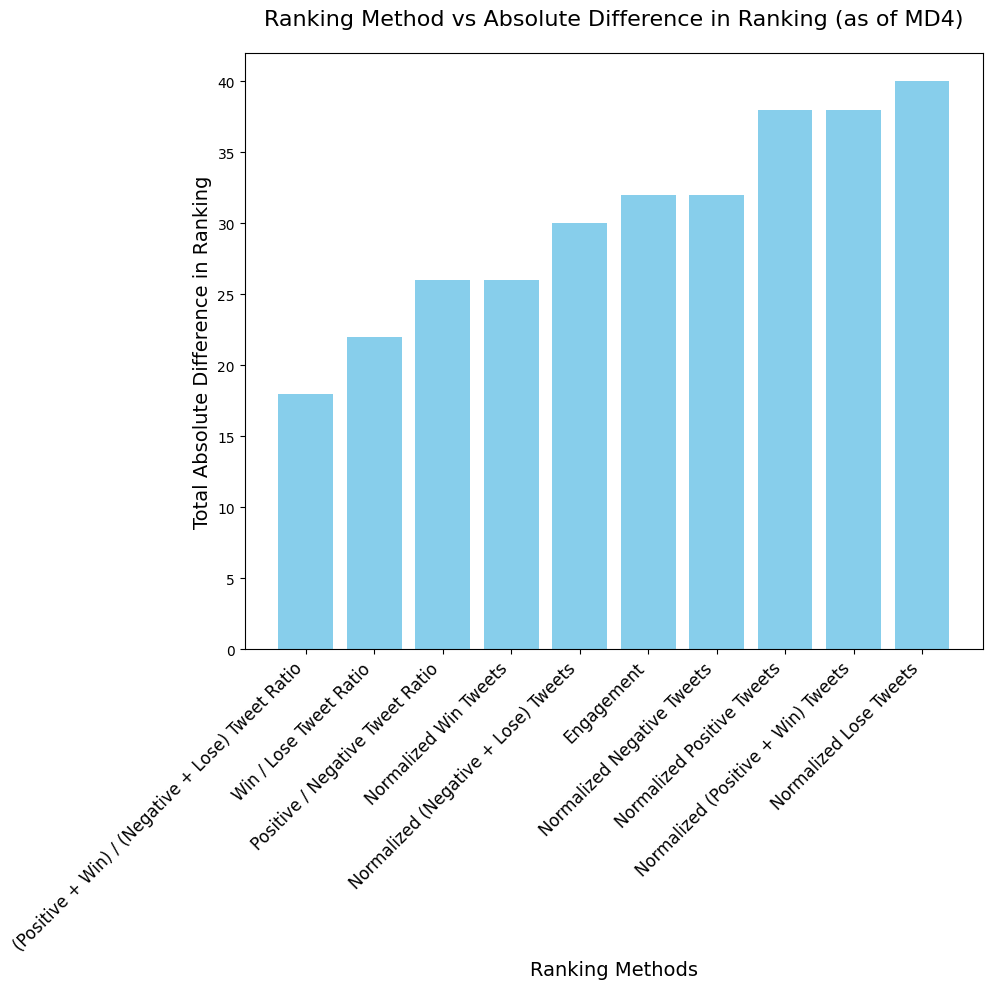

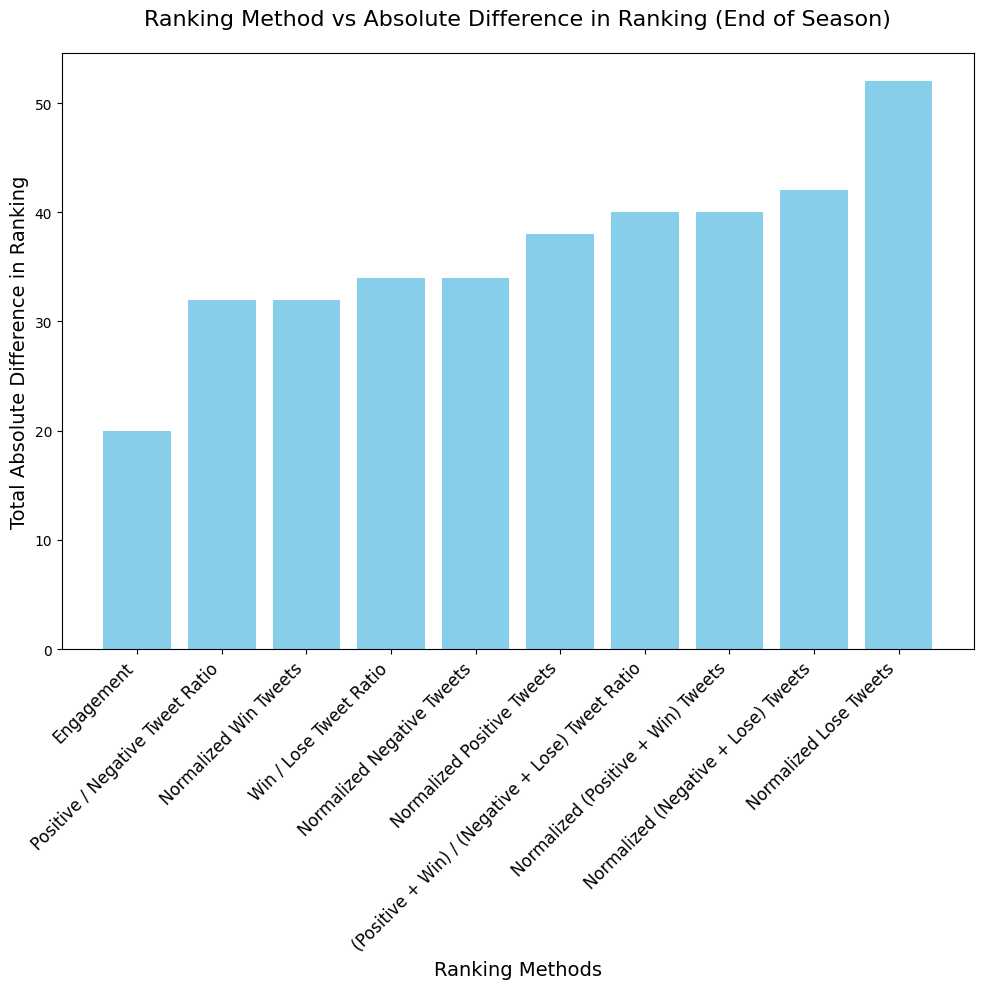

In [35]:
plot_ranking_differences(res_md4, title="Ranking Method vs Absolute Difference in Ranking (as of MD4)")

plot_ranking_differences(res_eos, title="Ranking Method vs Absolute Difference in Ranking (End of Season)")


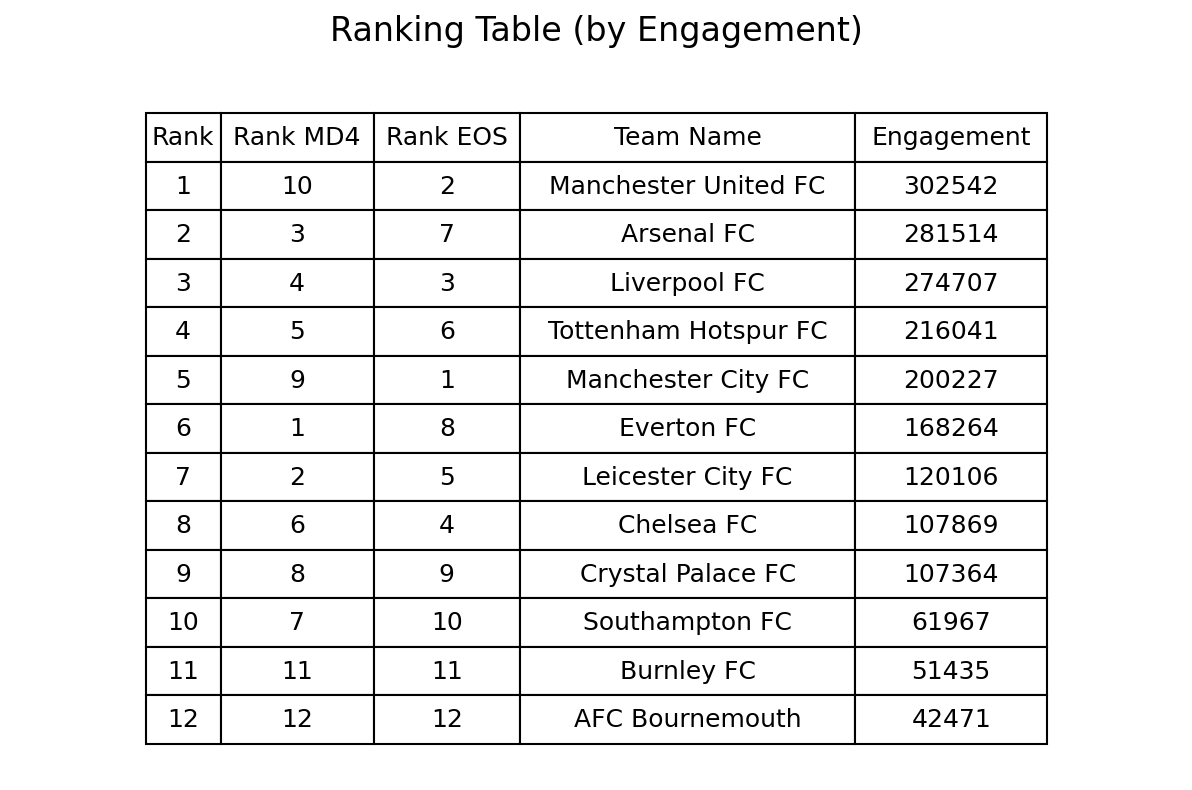

In [8]:
plot_ranking_table(teams, "engagement")

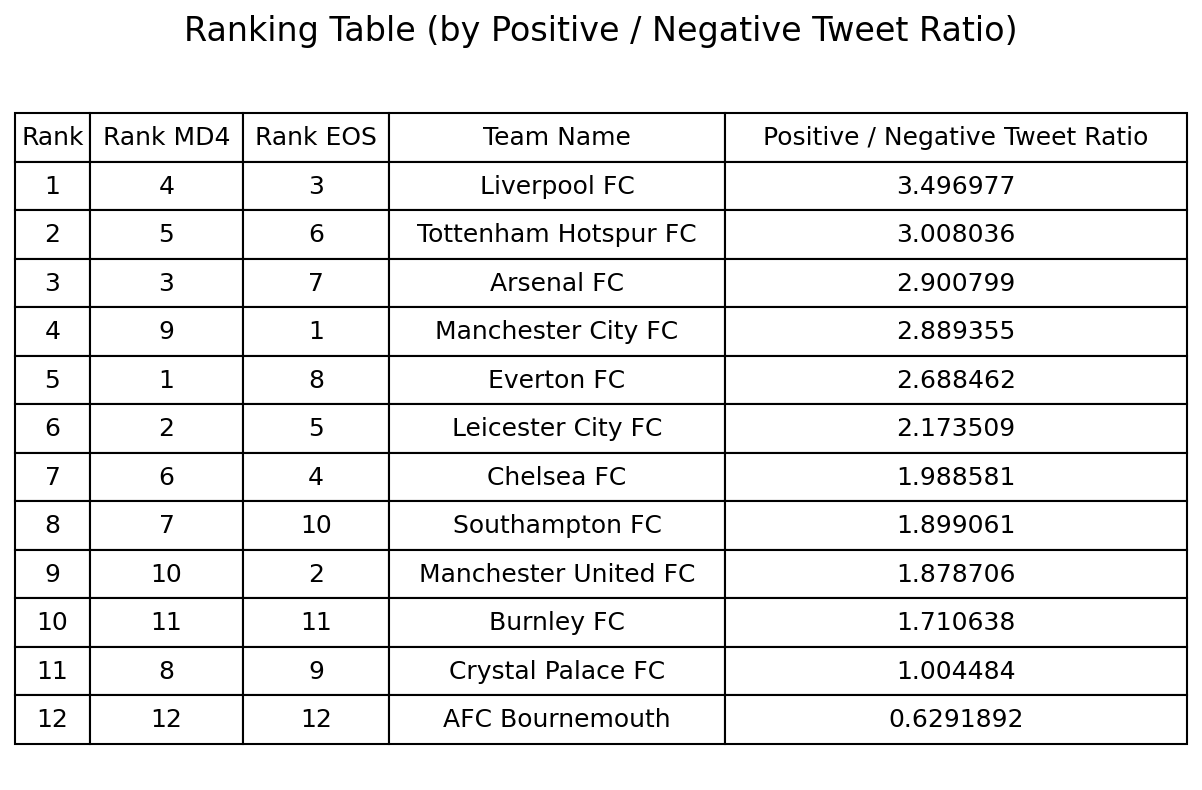

In [9]:
plot_ranking_table(teams, "pn_ratio")

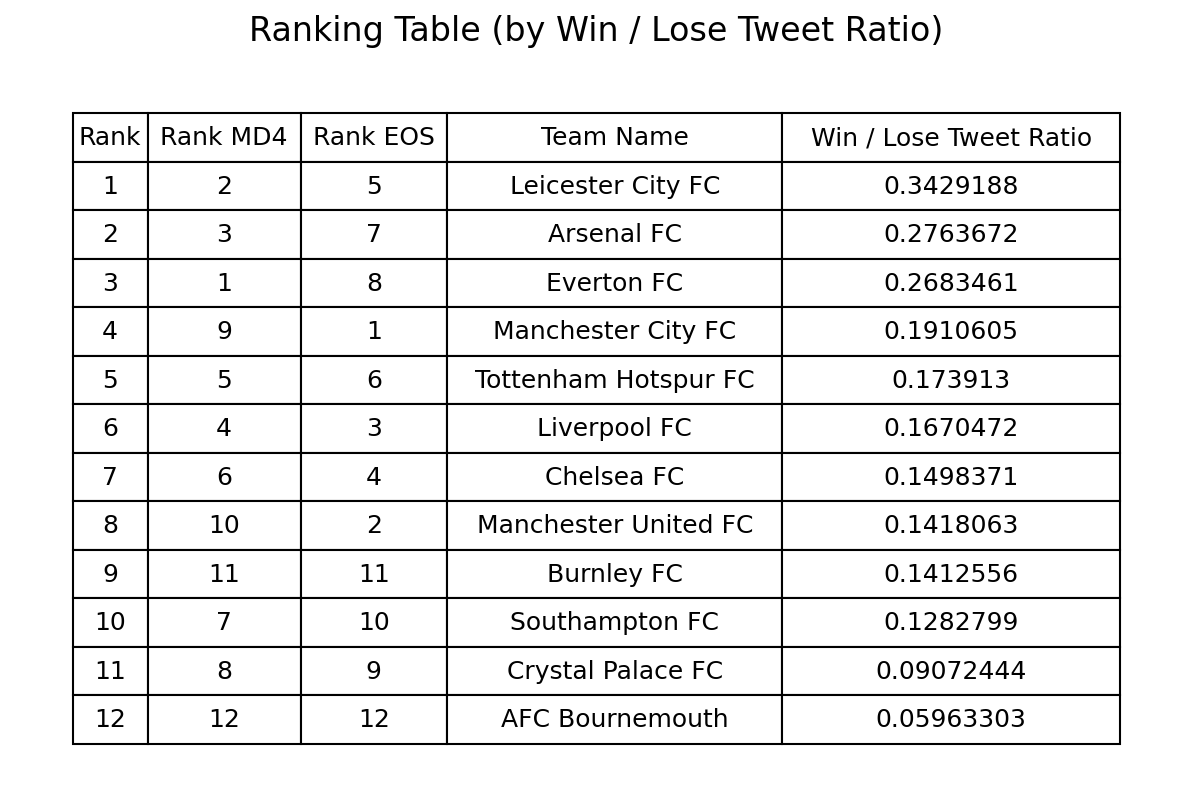

In [10]:
plot_ranking_table(teams, "wl_ratio")

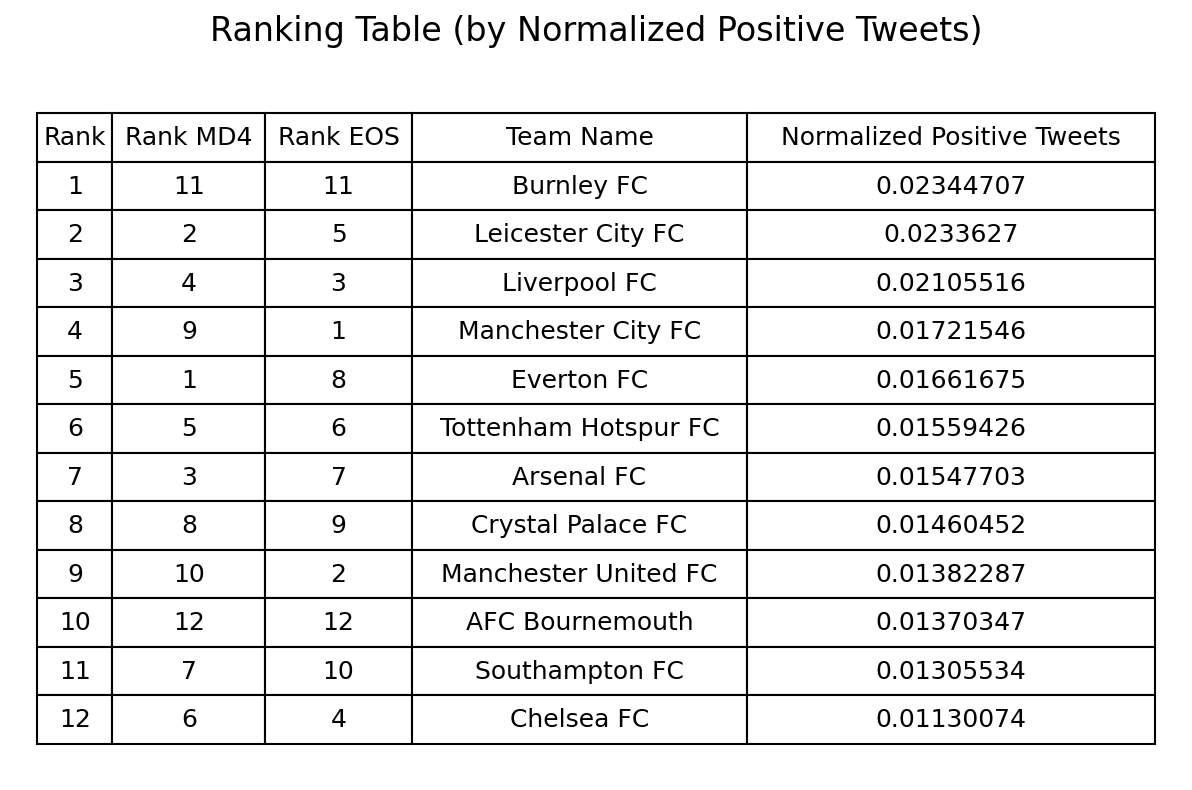

In [11]:
plot_ranking_table(teams, "pos_engagement")

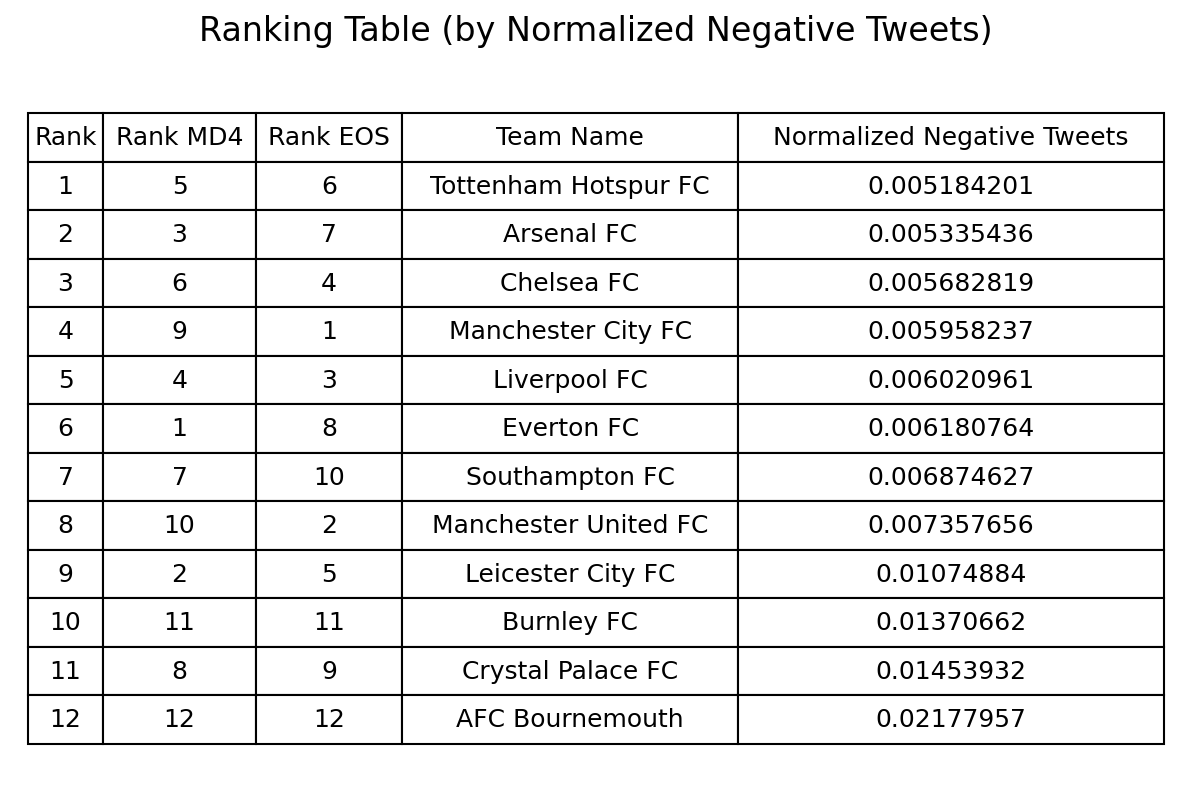

In [12]:
plot_ranking_table(teams, "neg_engagement", descending=False)

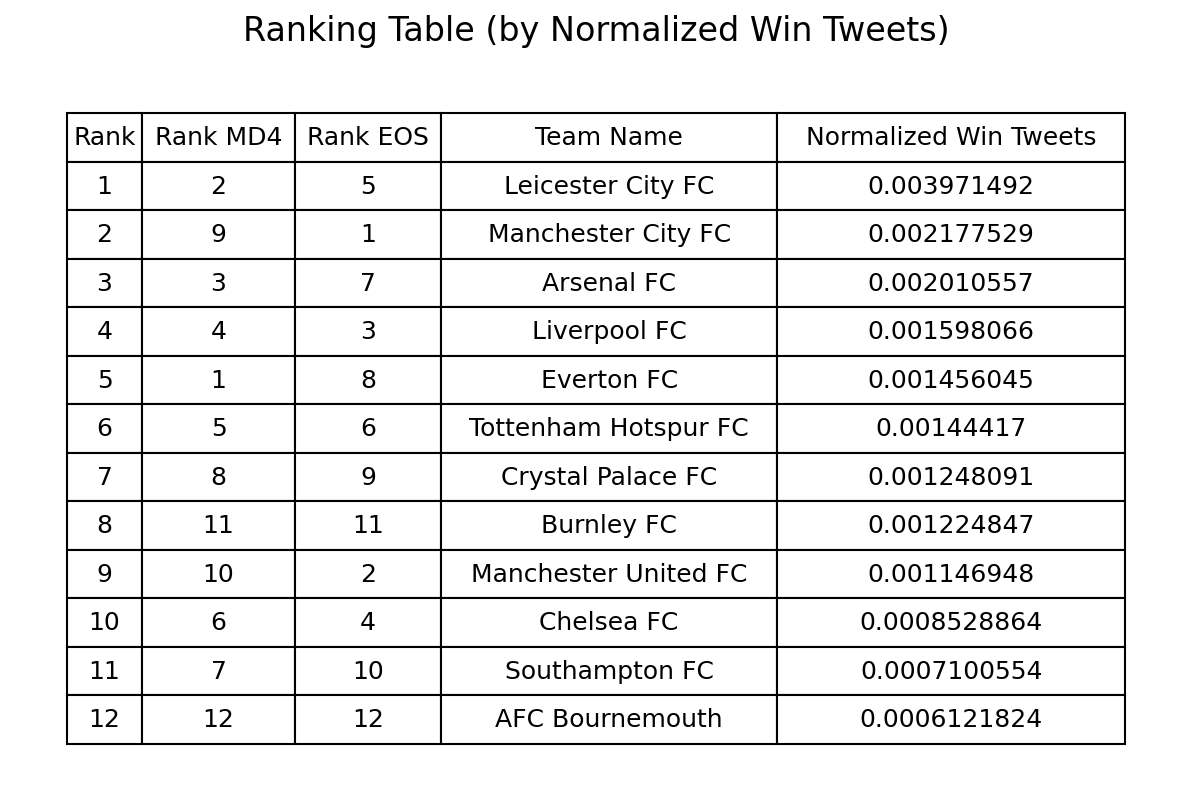

In [13]:
plot_ranking_table(teams, "win_engagement")

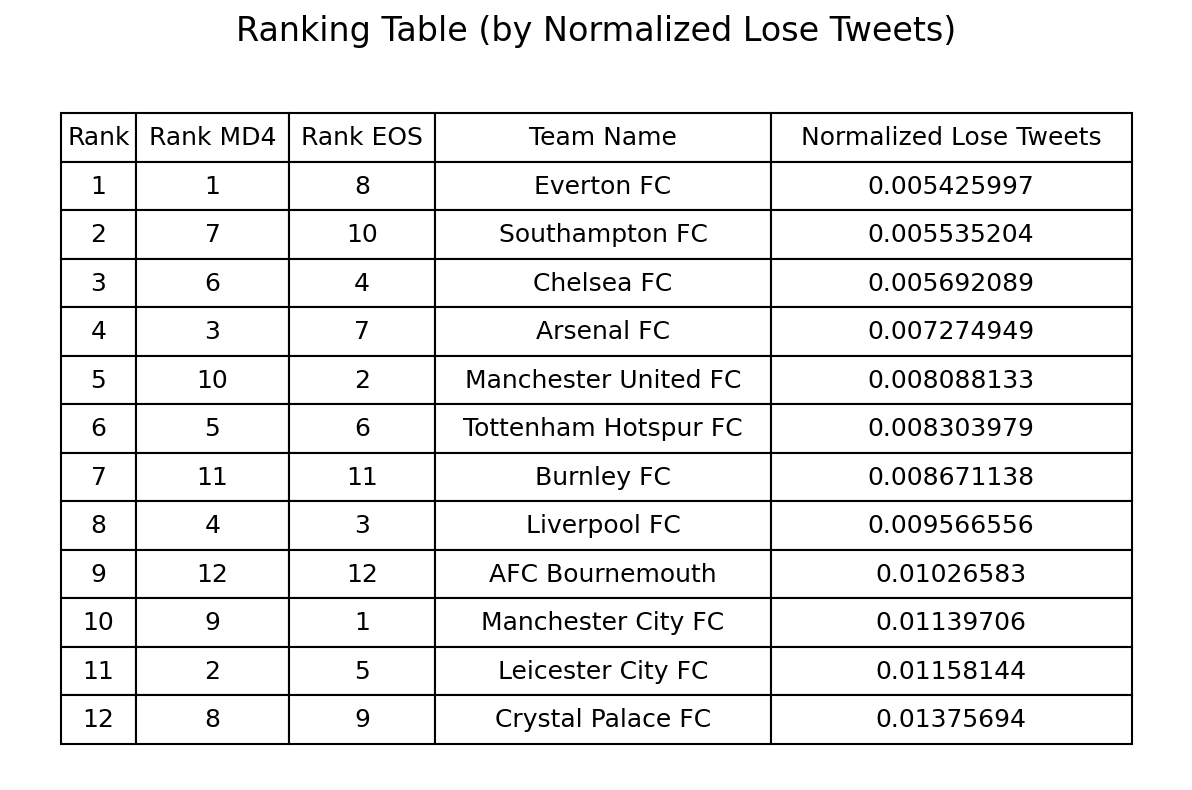

In [14]:
plot_ranking_table(teams, "lose_engagement", descending=False)

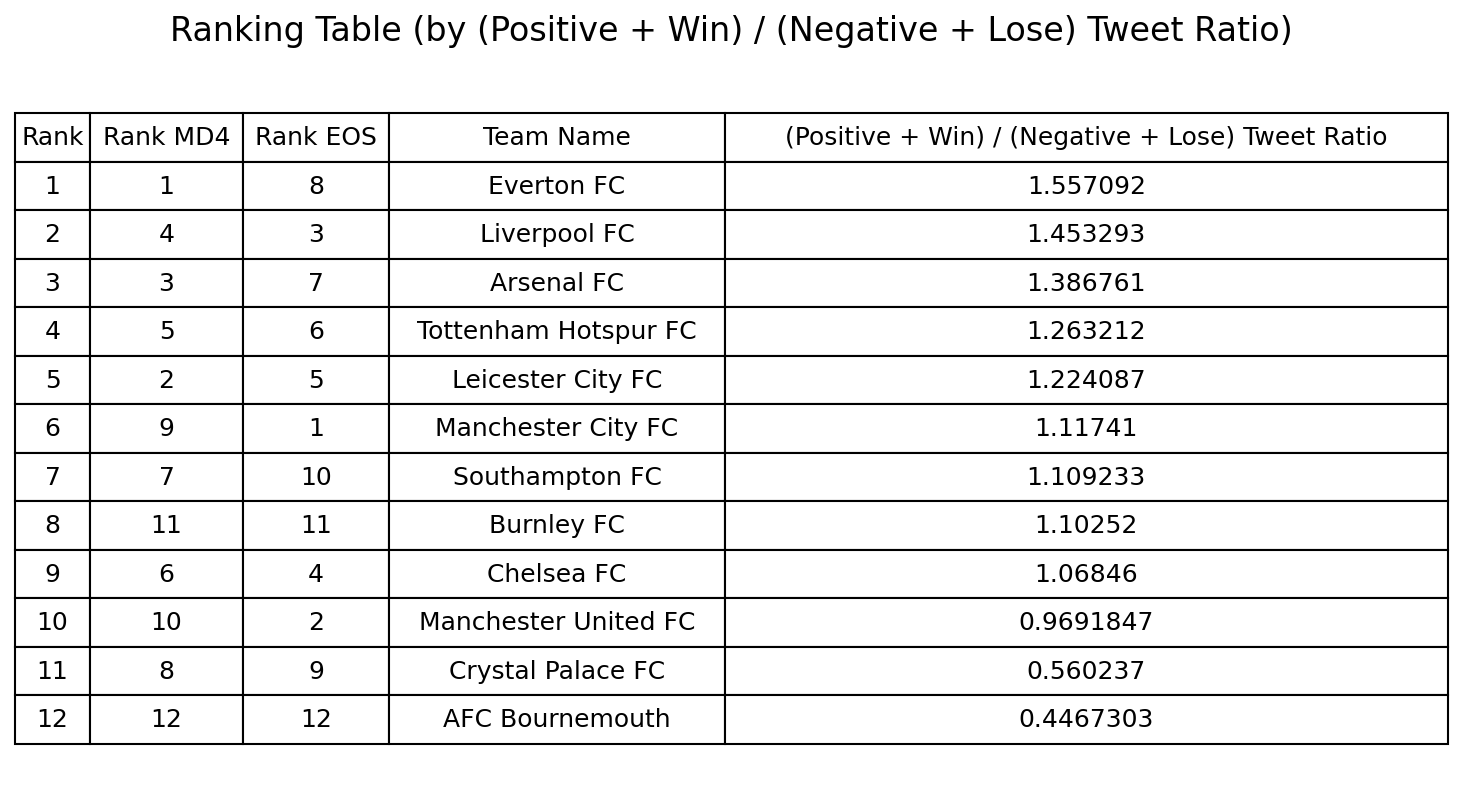

In [15]:
plot_ranking_table(teams, "pn_wl_ratio")

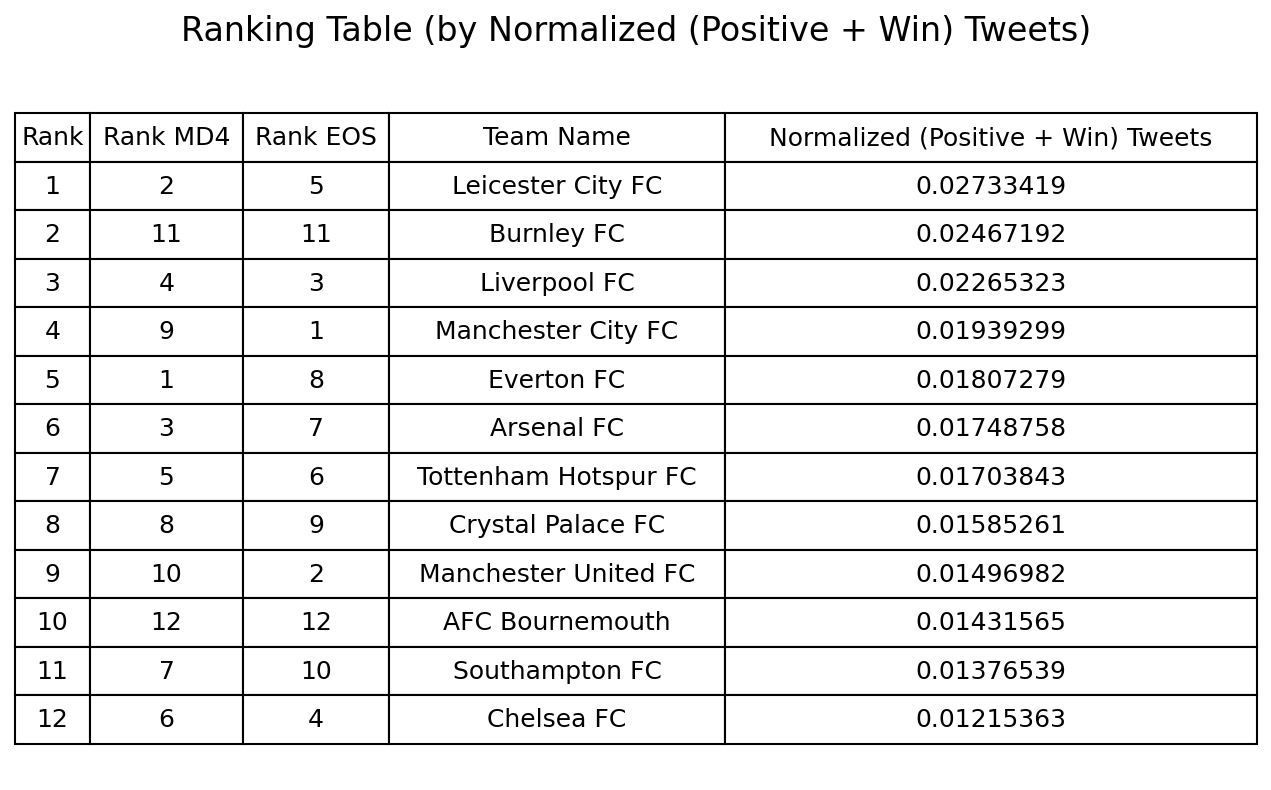

In [16]:
plot_ranking_table(teams, "pw_engagement")

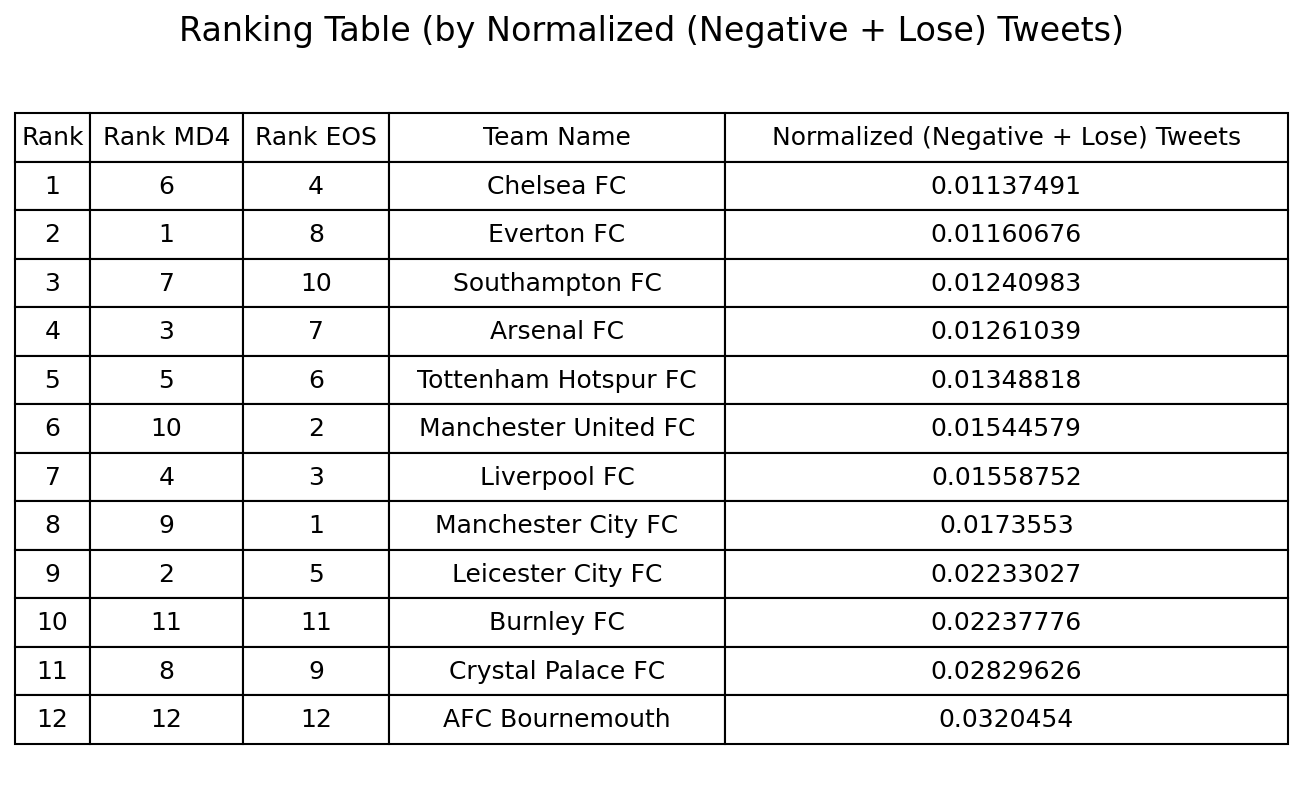

In [17]:
plot_ranking_table(teams, "nl_engagement", descending=False)